In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_NO2.pkl


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [3]:
df=df[['City','Date','AQI','AQI_Bucket','PM2.5', 'PM10', 'NO', 'NO2']]

In [4]:
cities=pd.unique(df['City'])
column1= cities+'PM10'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [5]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['PM10']))
    final_df[i][-n:]=np.array(df[df['City']==city]['PM10'])

In [6]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [7]:
final_df.tail()

,AhmedabadPM10,AizawlPM10,AmaravatiPM10,AmritsarPM10,BengaluruPM10,BhopalPM10,BrajrajnagarPM10,ChandigarhPM10,ChennaiPM10,DelhiPM10,...,JaipurPM10,JorapokharPM10,KochiPM10,KolkataPM10,LucknowPM10,MumbaiPM10,PatnaPM10,ShillongPM10,TalcherPM10,ThiruvananthapuramPM10
2020-01-01,113.567419,NaN,73.464516,86.416129,83.495161,142.442903,138.594286,94.056452,64.410968,238.522903,...,106.641290,179.814194,112.815000,183.164839,NaN,151.048065,170.553871,46.768261,278.444194,64.680323
2020-02-01,144.907931,NaN,61.153793,123.884074,92.368966,138.946552,144.098621,94.220690,67.577586,219.875517,...,123.383793,177.848214,118.480345,171.234138,NaN,159.725862,169.294828,65.762963,144.244828,69.411379
2020-03-01,108.049355,47.474762,41.132258,85.029677,79.966452,109.923929,109.650435,53.346452,42.870333,122.189032,...,82.639677,109.901905,102.664839,95.396129,NaN,106.506774,141.554839,54.253548,79.050357,55.811935
2020-04-01,81.426000,27.434667,38.551333,55.488000,46.863000,109.555833,140.500667,39.207333,174.091111,104.877667,...,75.736667,107.544333,34.892667,46.747333,NaN,66.265000,99.466000,56.948000,62.227667,40.238333
2020-05-01,93.180000,NaN,55.000000,130.470000,84.950000,77.000000,252.660000,39.780000,NaN,128.230000,...,76.150000,131.500000,26.020000,32.840000,NaN,42.500000,76.890000,12.400000,NaN,37.490000


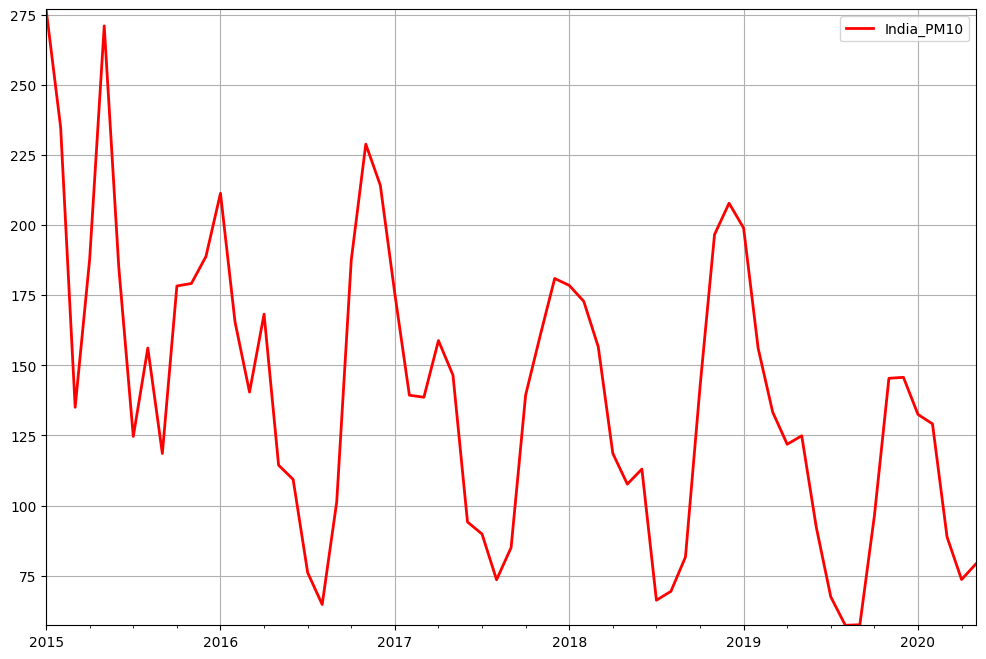

In [8]:
final_df['India_PM10']=final_df.mean(axis=1)
ax=final_df[['India_PM10']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [10]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadPM10,AizawlPM10,AmaravatiPM10,AmritsarPM10,BengaluruPM10,BhopalPM10,BrajrajnagarPM10,ChandigarhPM10,ChennaiPM10,DelhiPM10,...,JorapokharPM10,KochiPM10,KolkataPM10,LucknowPM10,MumbaiPM10,PatnaPM10,ShillongPM10,TalcherPM10,ThiruvananthapuramPM10,India_PM10
2019-01-01,NaN,NaN,153.266452,89.084839,102.305484,NaN,176.397419,NaN,NaN,320.044839,...,281.599677,NaN,311.115484,NaN,194.311935,NaN,NaN,328.746129,94.582903,198.973140
2019-02-01,NaN,NaN,104.492143,93.189286,97.484286,NaN,162.383571,NaN,NaN,212.379643,...,153.350000,NaN,218.615000,NaN,159.261786,NaN,NaN,371.387500,67.879286,156.129555
2019-03-01,NaN,NaN,69.736452,88.459355,109.819355,NaN,156.236129,NaN,NaN,181.935484,...,133.425517,NaN,133.862581,NaN,120.261613,NaN,NaN,234.772500,77.991290,133.344282
2019-04-01,NaN,NaN,59.048333,107.946333,99.016000,NaN,144.822500,NaN,NaN,229.141333,...,113.930333,NaN,85.099333,NaN,77.837000,NaN,NaN,160.773448,54.825667,121.860153
2019-05-01,136.41,NaN,105.887742,103.571935,88.252903,NaN,119.690000,NaN,NaN,246.818387,...,93.689667,NaN,93.259677,NaN,65.253226,NaN,NaN,143.102667,63.653548,124.877775


In [11]:
df_2019.isna().sum()

AhmedabadPM10              4
AizawlPM10                13
AmaravatiPM10              1
AmritsarPM10               0
BengaluruPM10              0
BhopalPM10                 8
BrajrajnagarPM10           0
ChandigarhPM10             8
ChennaiPM10                5
DelhiPM10                  0
ErnakulamPM10             12
GurugramPM10               0
GuwahatiPM10               1
HyderabadPM10              0
JaipurPM10                 0
JorapokharPM10             0
KochiPM10                 12
KolkataPM10                0
LucknowPM10               13
MumbaiPM10                 0
PatnaPM10                 11
ShillongPM10               7
TalcherPM10                0
ThiruvananthapuramPM10     0
India_PM10                 0
dtype: int64

In [12]:
df_2019=df_2019.drop(['AizawlPM10','LucknowPM10','KochiPM10','PatnaPM10'],axis=1)

In [13]:
PM10_2019 = df_2019.mean(axis=0)

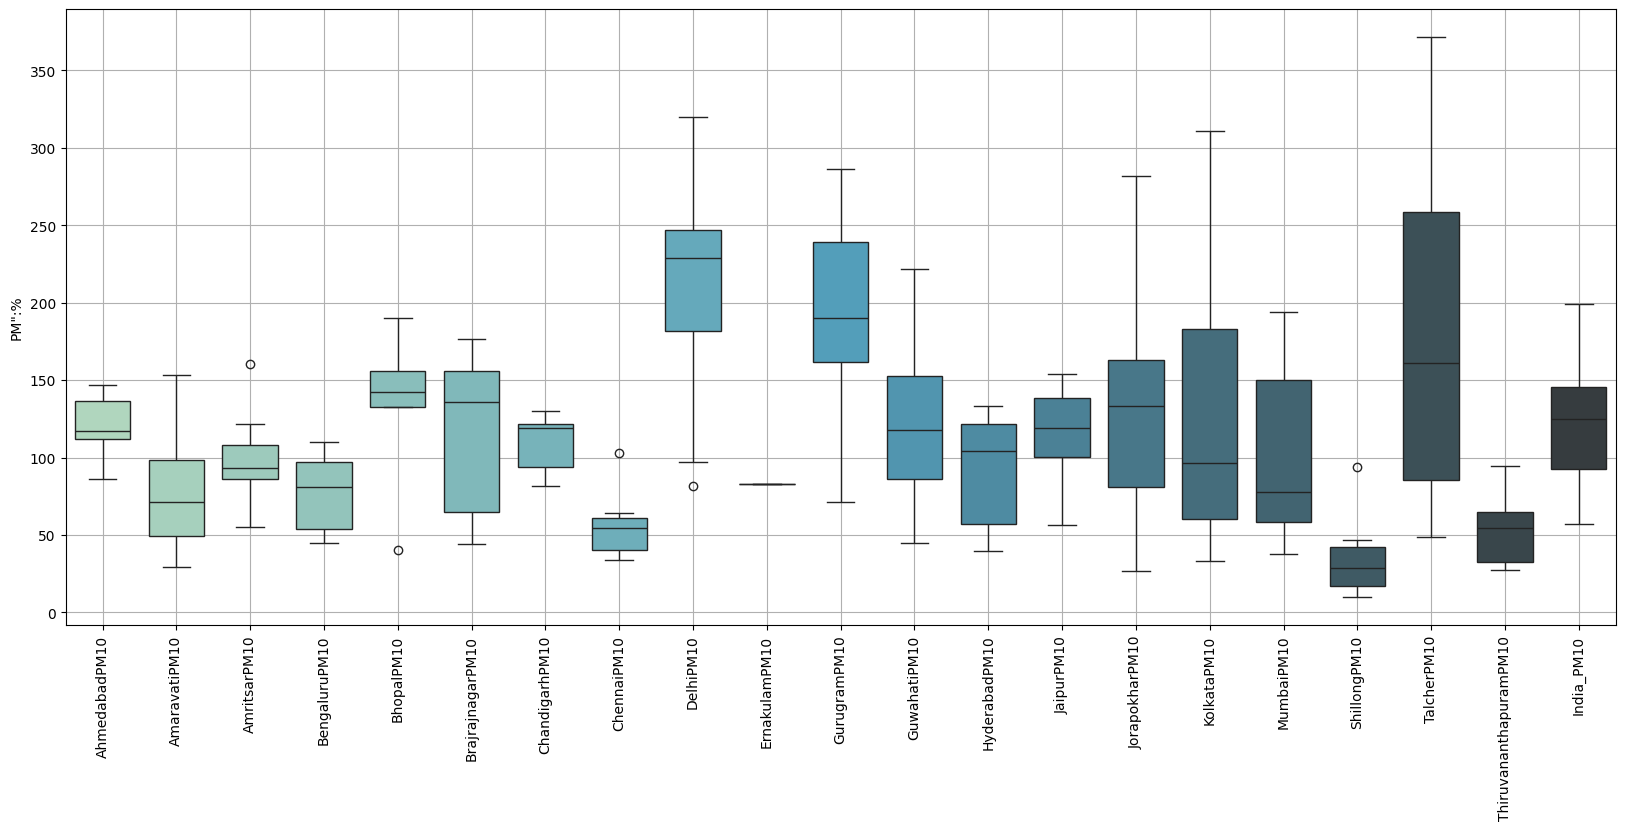

In [14]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('PM":%');
bplot.grid(True)

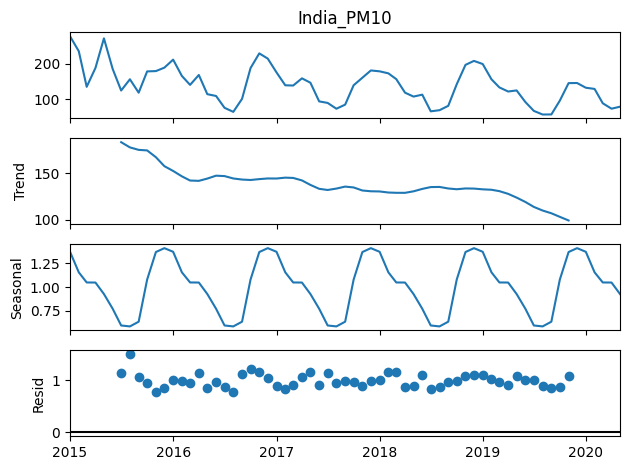

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_PM10=final_df['India_PM10']
result=seasonal_decompose(India_PM10,model='multiplicative')
result.plot();

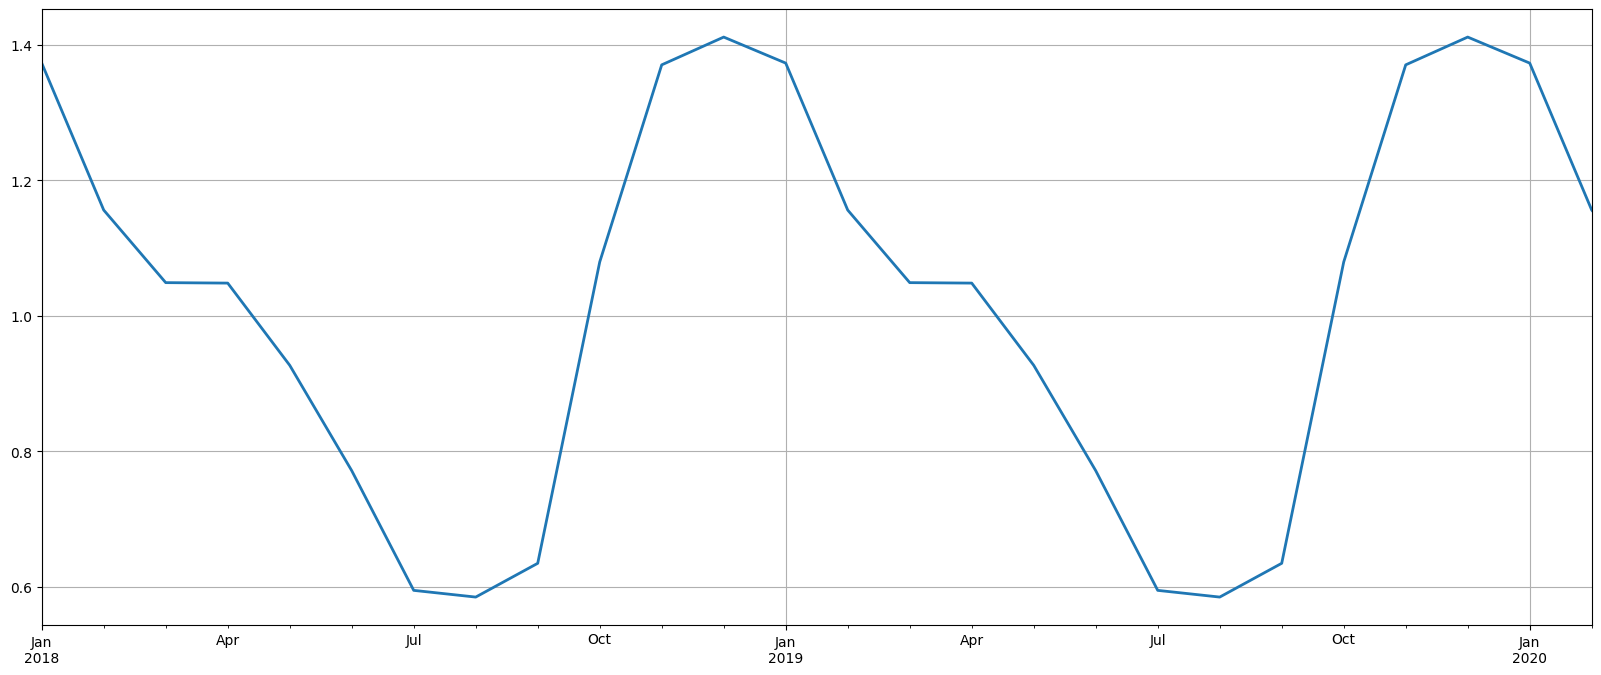

In [16]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [17]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;  

In [18]:
auto_arima(y=India_PM10,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   65
Model:             SARIMAX(0, 1, 2)x(2, 0, [], 12)   Log Likelihood                -304.593
Date:                             Thu, 04 Jan 2024   AIC                            619.186
Time:                                     13:04:43   BIC                            629.980
Sample:                                 01-01-2015   HQIC                           623.438
                                      - 05-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1685      0.133     -1.271      0.204      -0.428       0.091
ma.L2         -0.5820      0.101     -5.785      0.000      -0.779      -0.385
ar.S.L12       0.2517      0.086      2.943      0.003       0.084       0.419
ar.S.L24       0.5333      0.111      4.792      0.000       0.315       0.751
sigma2       649.9476    132.398      4.909      0.000     390.452     909.443
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.79   Prob(JB):                         0.61
Heteroskedasticity (H):               0.20   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
len(India_PM10)

65

In [20]:
#dividing into train and test:
train=India_PM10[:41]
test=India_PM10[42:54] 

In [21]:
# Forming the model:
model=SARIMAX(train,order=(2,0,2),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16842D+01    |proj g|=  1.29100D+01

At iterate    5    f=  5.16096D+00    |proj g|=  2.76062D-01

At iterate   10    f=  5.03743D+00    |proj g|=  2.29381D-02

At iterate   15    f=  5.01249D+00    |proj g|=  1.22763D-02

At iterate   20    f=  5.00986D+00    |proj g|=  2.01632D-03

At iterate   25    f=  5.00830D+00    |proj g|=  1.11398D-02

At iterate   30    f=  5.00570D+00    |proj g|=  3.40278D-03

At iterate   35    f=  5.00532D+00    |proj g|=  4.78092D-03

At iterate   40    f=  5.00466D+00    |proj g|=  2.25044D-04

At iterate   45    f=  5.00466D+00    |proj g|=  2.15735D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           India_PM10   No. Observations:                   41
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -205.191
Date:                              Thu, 04 Jan 2024   AIC                            424.382
Time:                                      13:05:15   BIC                            436.377
Sample:                                  01-01-2015   HQIC                           428.750
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0761      0.291      3.693      0.000       0.505       1.647
ar.L2         -0.0798      0.289     -0.277      0.782      -0.645       0.486
ma.L1         -0.2173      0.267     -0.815      0.415      -0.740       0.305
ma.L2         -0.5934      0.178     -3.334      0.001      -0.942      -0.245
ar.S.L12       0.7845      0.687      1.143      0.253      -0.561       2.130
ma.S.L12      -0.4489      1.007     -0.446      0.656      -2.423       1.526
sigma2      1069.9426    338.694      3.159      0.002     406.116    1733.770
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.64   Prob(JB):                         0.52
Heteroskedasticity (H):               0.26   Skew:                            -0.42
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')


<Axes: >

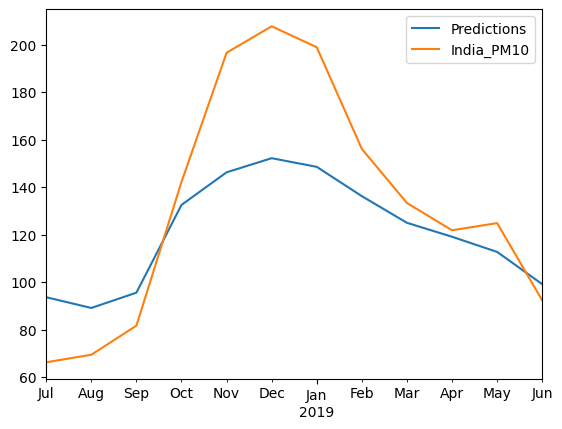

In [23]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [24]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean PM10',test.mean())

RMSE =  29.240270764725512
Mean PM10 132.6243015180089


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96315D+00    |proj g|=  1.60693D-01

At iterate    5    f=  4.93386D+00    |proj g|=  3.16501D-02

At iterate   10    f=  4.92191D+00    |proj g|=  6.15209D-03

At iterate   15    f=  4.90534D+00    |proj g|=  2.69838D-03

At iterate   20    f=  4.90515D+00    |proj g|=  1.60531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   3.578D-07   4.905D+00
  F =   4.9051544266168907     

CONVERG

 This problem is unconstrained.


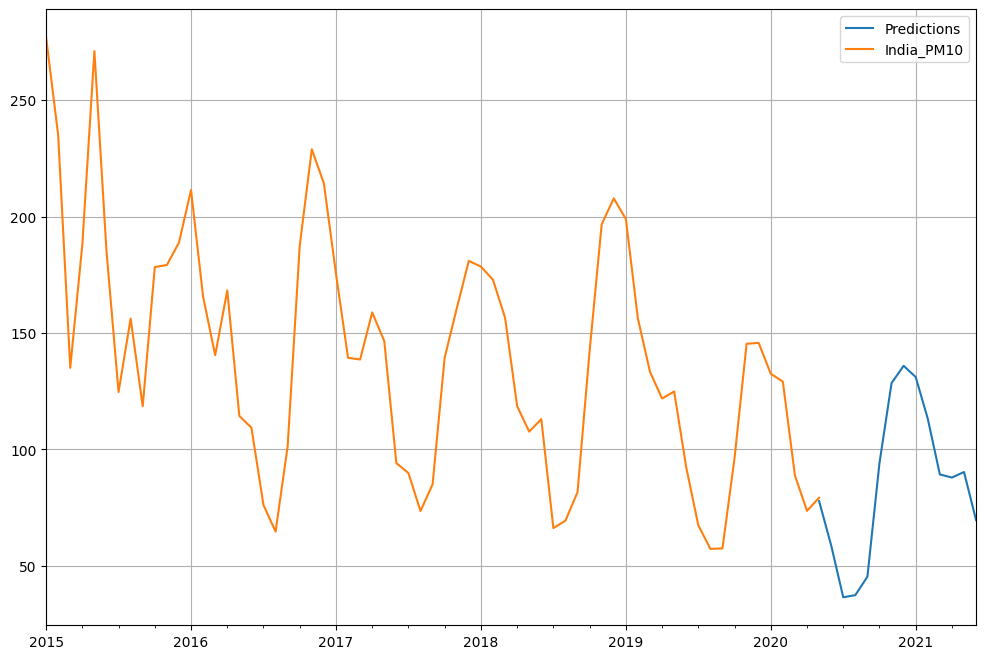

In [25]:
# Forming the model:
model=SARIMAX(India_PM10,order=(2,0,0),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_PM10.plot(legend=True,figsize=(12,8),grid=True);

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48695D+00    |proj g|=  4.56190D-01

At iterate    5    f=  5.13138D+00    |proj g|=  4.03132D-03

At iterate   10    f=  5.12623D+00    |proj g|=  1.27526D-02

At iterate   15    f=  5.11944D+00    |proj g|=  1.64125D-03

At iterate   20    f=  5.11941D+00    |proj g|=  1.07490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   6.939D-06   5.119D+00
  F =   5.1194037777575154     

CONVERG

 This problem is unconstrained.


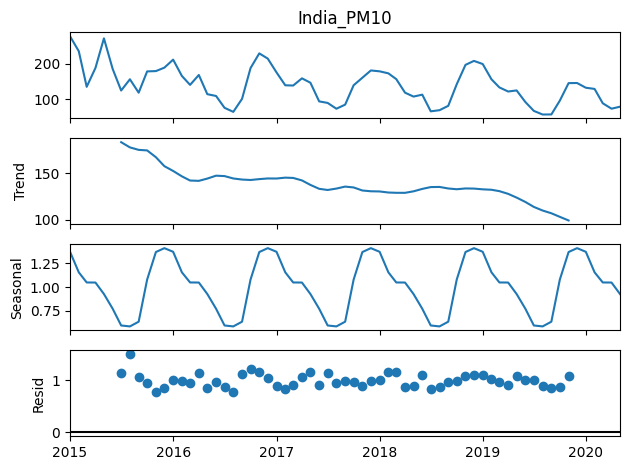

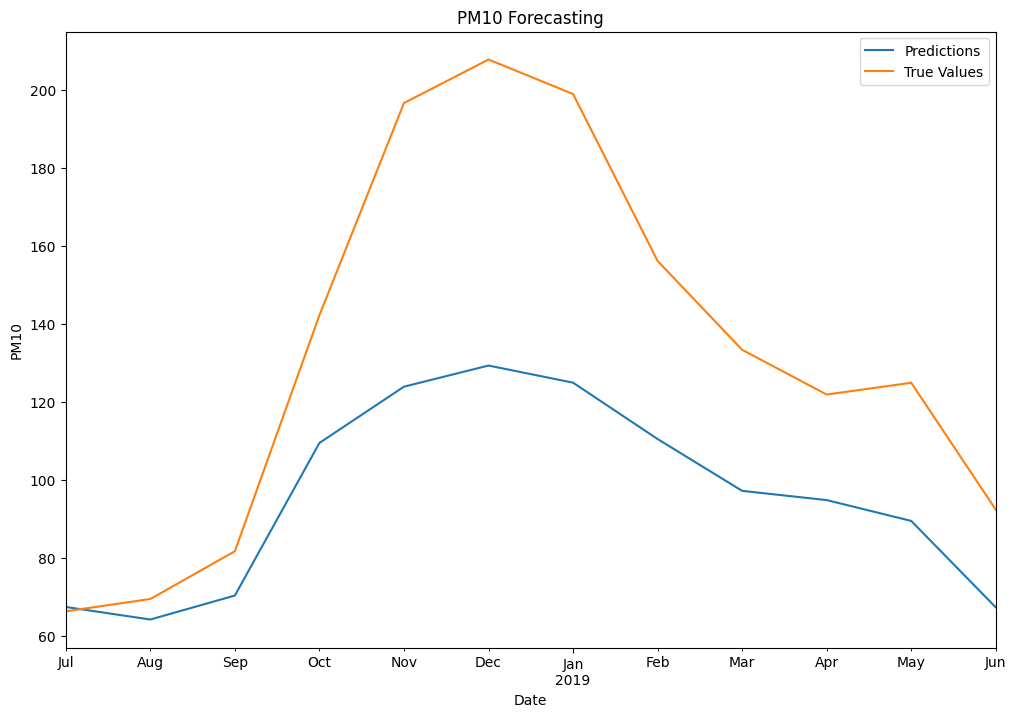

RMSE: 44.901677041917985
Mean PM10 (test data): 132.6243015180089
Forecasted PM10 for 2020-06-01: 56.00433307708681


In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['City', 'Date', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'SO2', 'NO2', 'CO']]
cities = pd.unique(df['City'])
column1 = cities + 'PM10'
column2 = cities + '_AQI_'
columns = [*column1, *column2]
final_df = pd.DataFrame(index=np.arange('2015-01-01', '2020-05-02', dtype='datetime64[D]'), columns=column1)

for city, i in zip(cities, final_df.columns):
    n = len(np.array(df[df['City'] == city]['PM10']))
    final_df[i][-n:] = np.array(df[df['City'] == city]['PM10'])

final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

final_df['India_PM10'] = final_df.mean(axis=1)

# Plot seasonal decomposition
India_PM10 = final_df['India_PM10']
result = seasonal_decompose(India_PM10, model='multiplicative')
result.plot();

# Load specific forecasting tools
auto_arima_result = auto_arima(y=India_PM10, start_p=0, start_P=0, start_q=0, start_Q=0, seasonal=True, m=12)

# Divide into train and test
train = India_PM10[:41]
test = India_PM10[42:54]

# Forming the model
model = SARIMAX(train, order=(2, 0, 0), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Obtain predicted values for the specific date
specific_date = '2020-06-01'
forecast = results.get_prediction(start=pd.to_datetime(specific_date), end=pd.to_datetime(specific_date), dynamic=False)
predicted_PM10_specific_date = forecast.predicted_mean.values[0]

# Plotting
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
plt.figure(figsize=(12, 8))
predictions.plot(legend=True, label='Predictions')
test.plot(legend=True, label='True Values')
plt.title('PM10 Forecasting')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.show()

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(predictions, test))
print('RMSE:', RMSE)
print('Mean PM10 (test data):', test.mean())
print(f'Forecasted PM10 for {specific_date}: {predicted_PM10_specific_date}')

In [31]:
predictions

2018-07-01     67.358317
2018-08-01     64.136470
2018-09-01     70.290121
2018-10-01    109.438364
2018-11-01    123.878776
2018-12-01    129.298277
2019-01-01    124.906075
2019-02-01    110.448210
2019-03-01     97.146164
2019-04-01     94.777035
2019-05-01     89.434352
2019-06-01     67.252569
Freq: MS, Name: Predictions, dtype: float64

In [32]:
import pickle


# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl', 'wb') as file:
    pickle.dump(results, file)

In [33]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the specific date for forecasting
specific_date = '2020-06-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted PM10 value for {specific_date} is: {predicted_value}")


The forecasted PM10 value for 2020-06-01 is: 56.00433307708681
